In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [189]:
data = pd.read_csv('data\concrete.csv')
print(data.shape)
data.head()

(1030, 9)


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\lebed\AppData\Local\Temp\ipykernel_16732\1435676111.py:1: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv('data\concrete.csv')


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Data examination
Columns description:  
Cement - measured in kg in a m3 mixture  
Slag (blast furnace slag) - measured in kg in a m3 mixture  
Ash (fly ash) - measured in kg in a m3 mixture  
Water - measured in kg in a m3 mixture  
Superplastic (superplasticizer) - measured in kg in a m3 mixture  
Coarseagg (coarse aggregate) - measured in kg in a m3 mixture  
Fineagg (fine aggregate) - measured in kg in a m3 mixture  
Age - day (1-365)  
Strength (concrete compressive strength) - measured in MPa  

For the examination, I'll check:
1. Missing values
2. Distribution of data
3. Identify and remove potential outliers

In [190]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [191]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


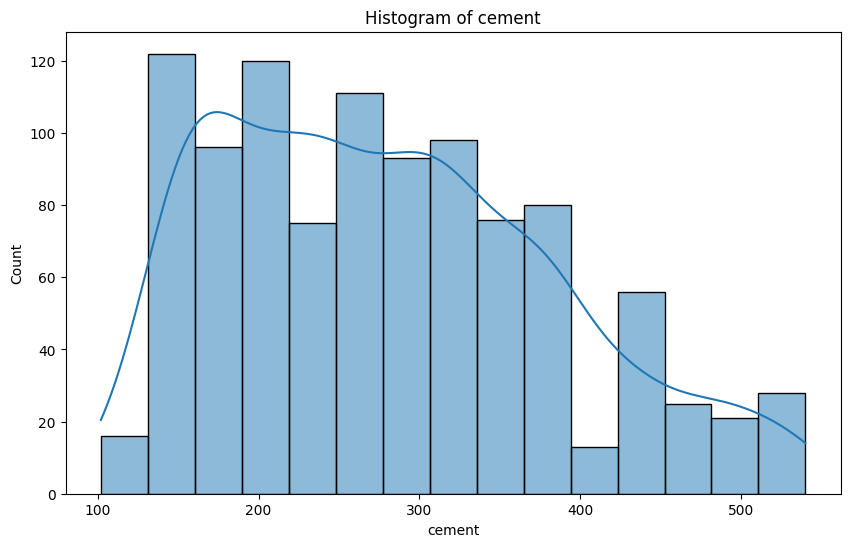

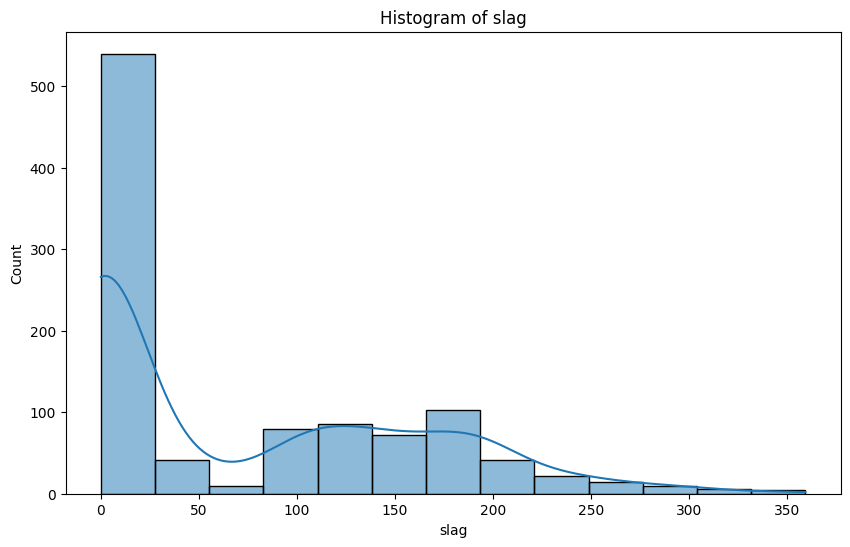

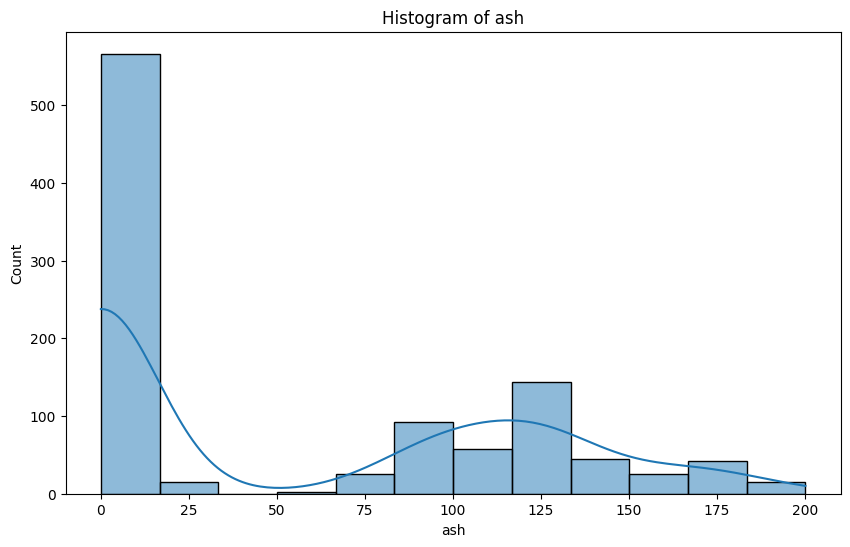

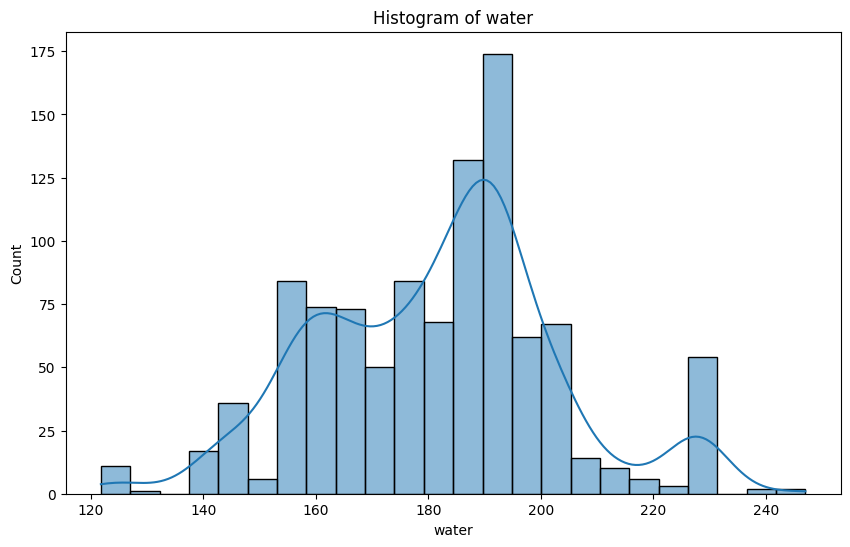

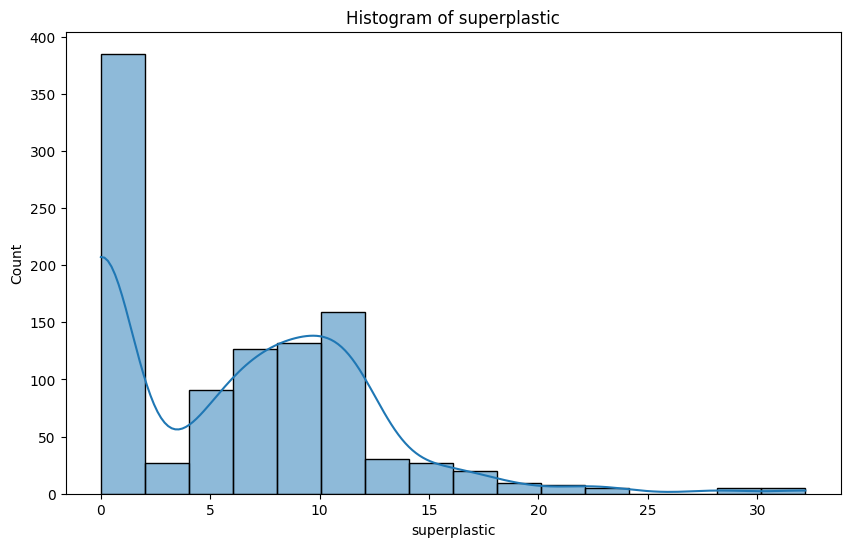

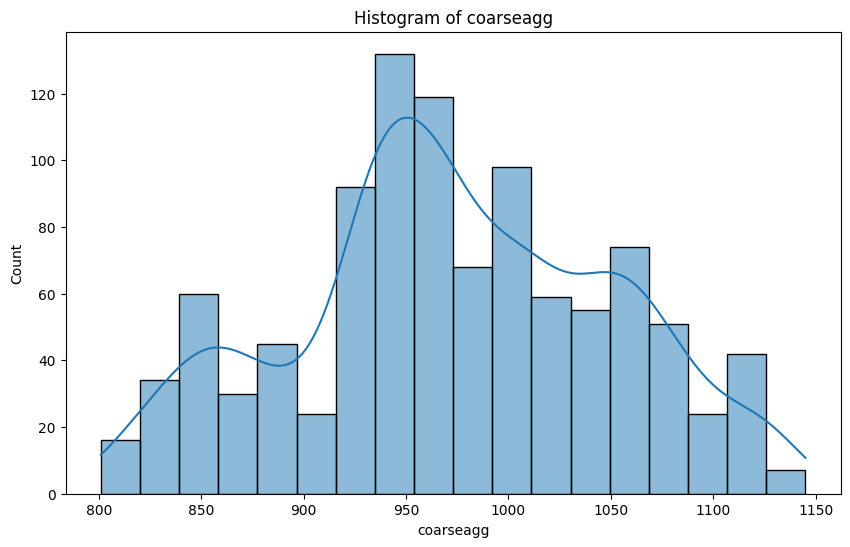

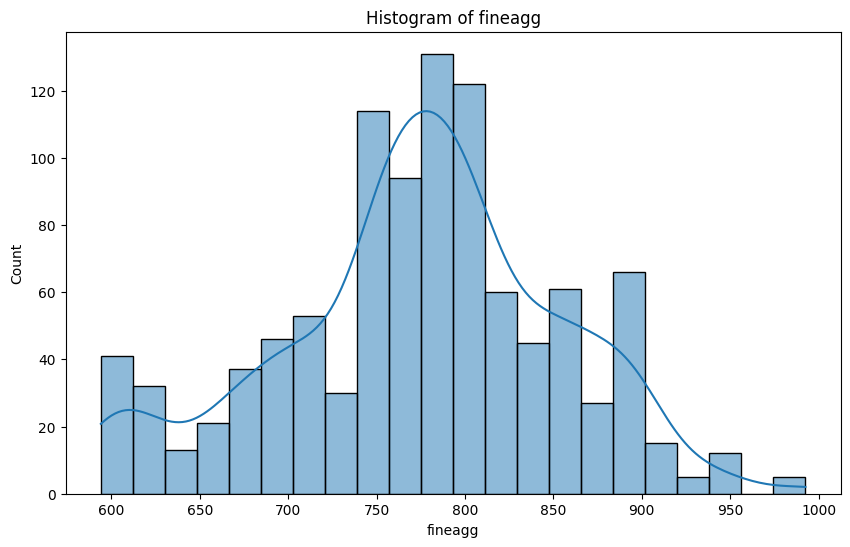

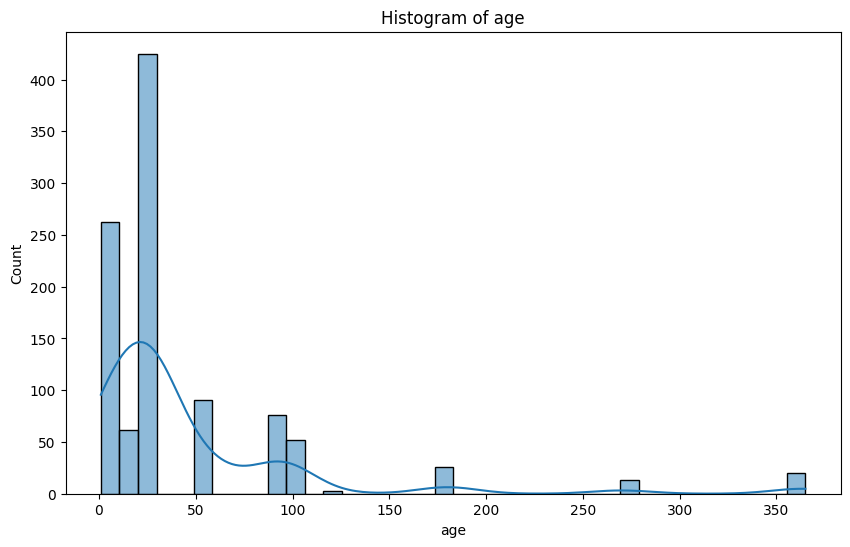

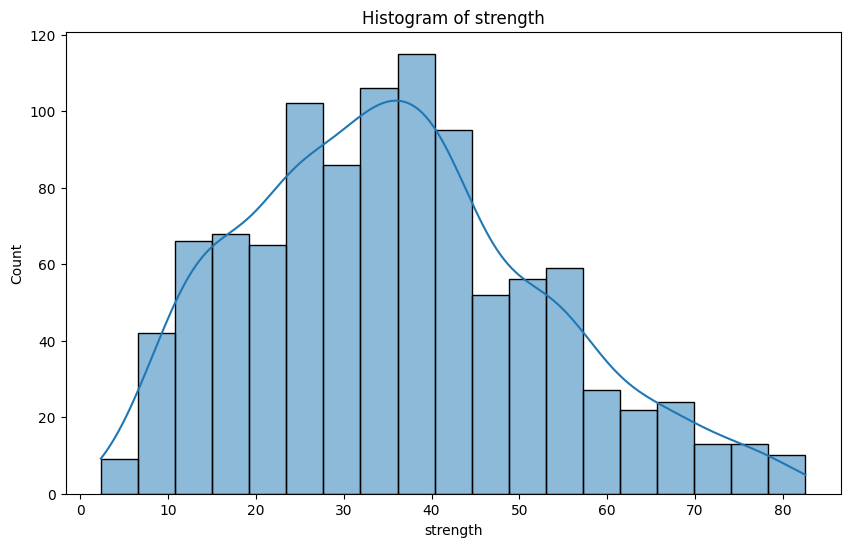

In [192]:
plt.figure(figsize=(10,6))
plt.title('Histogram of cement')
sns.histplot(data=data,x='cement', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of slag')
sns.histplot(data=data,x='slag', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of ash')
sns.histplot(data=data,x='ash', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of water')
sns.histplot(data=data,x='water', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of superplastic')
sns.histplot(data=data,x='superplastic', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of coarseagg')
sns.histplot(data=data,x='coarseagg', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of fineagg')
sns.histplot(data=data,x='fineagg', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of age')
sns.histplot(data=data,x='age', kde=True);

plt.figure(figsize=(10,6))
plt.title('Histogram of strength')
sns.histplot(data=data,x='strength', kde=True);

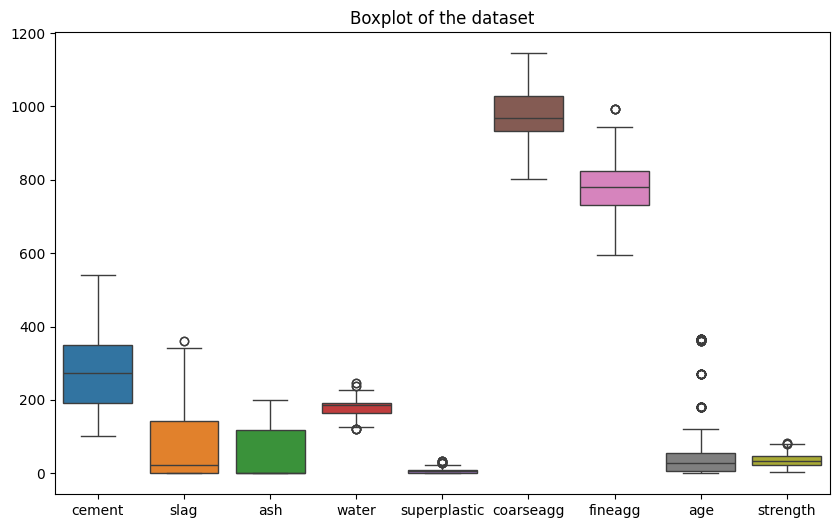

In [193]:
plt.figure(figsize=(10,6))
plt.title('Boxplot of the dataset')
sns.boxplot(data=data);

There are a few outliers in certain features:
* slag
* water
* superplastic
* age  
* fineagg  

Besides this there are a few fetures with far from normal distributions:
* slag
* ash
* superplastic
* age  

For substance features, we can see that they are not commonly used and if we do not account for cases when the amount is eqal to zero, we can see a resemblance of normal distribution.

<Axes: title={'center': 'Boxplot of fineagg'}, xlabel='fineagg'>

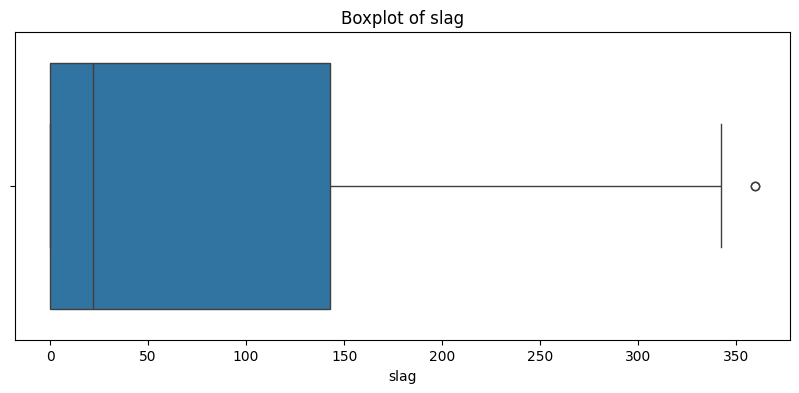

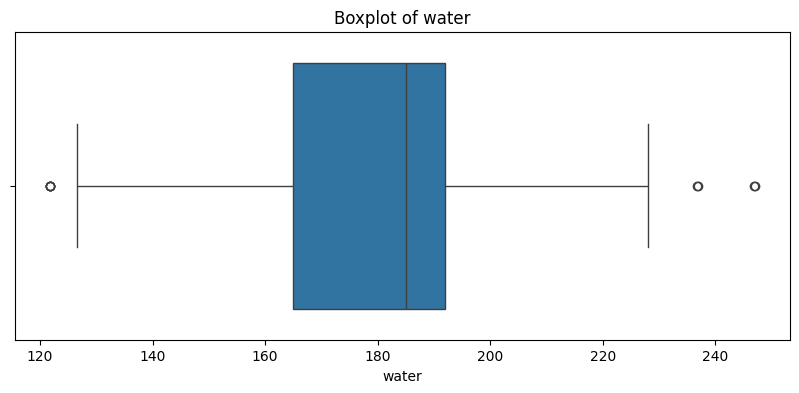

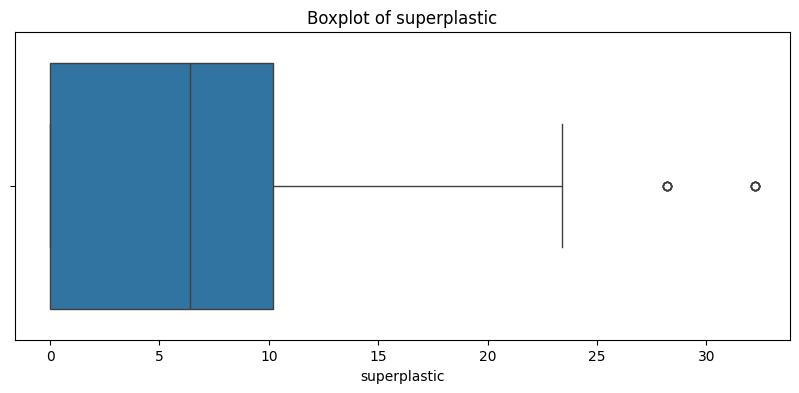

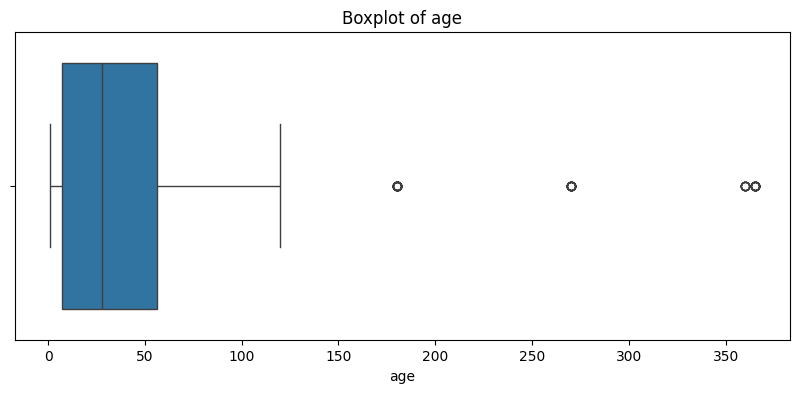

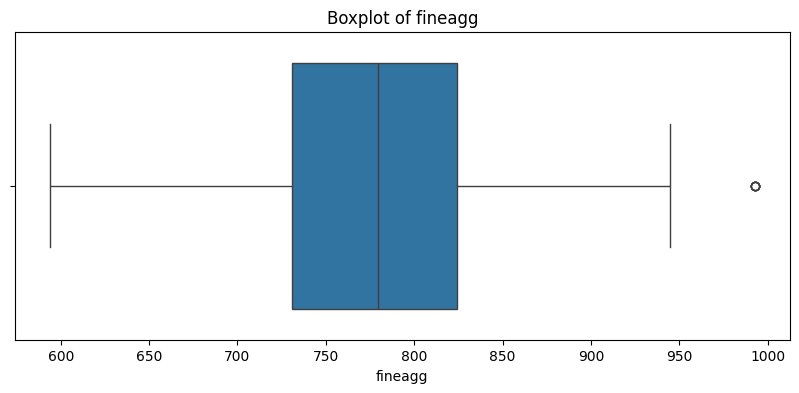

In [195]:
plt.figure(figsize=(10,4))
plt.title('Boxplot of slag')
sns.boxplot(data=data, x='slag');

plt.figure(figsize=(10,4))
plt.title('Boxplot of water')
sns.boxplot(data=data, x='water')

plt.figure(figsize=(10,4))
plt.title('Boxplot of superplastic')
sns.boxplot(data=data, x='superplastic')

plt.figure(figsize=(10,4))
plt.title('Boxplot of age')
sns.boxplot(data=data, x='age')

plt.figure(figsize=(10,4))
plt.title('Boxplot of fineagg')
sns.boxplot(data=data, x='fineagg')

In [177]:
data[data['slag'] > 350]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


In [178]:
data[(data['water'] > 230) | (data['water'] < 125)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


In [179]:
data[data['superplastic'] > 25]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


In [180]:
data[data['age'] > 150]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Improving the dataset
1) Outliers - the number of outliers in substance variable is small, so it'll easier to drop them
2) Time - as I'm more interested in the strength properties o deferent alloys and do not plan to examine time series data, I'll drop them. In order to make the data more reliable (I saw a few observations with similar alloys and different time), I'll combine the observations of the same alloys over time, and taking the mean value of the strength.
3) Distributions - I believe that proportions of substances used in the alloy play a key role in defining the properties of the end result. As such I'll engage in feature engineering and add variables that would represent proportions in the alloy. I'll not be standardizing the data as all the features share the same measurement system.
4) Distributions with high number of zeroes - I think it will be rational to add boolean variable that would indicate if the material was used or not. Later I'll se if this can be a better mantric than the original one.

## Removal of outliers

In [181]:
data = data.loc[data['slag'] < 350]
data = data.loc[(data['water'] > 125) & (data['water'] < 230)]
data = data.loc[data['superplastic'] <= 25]

## Removal of time variable 

In [182]:
data = data.groupby(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg'])['strength'].mean().reset_index()

In [183]:
print(data.shape) #the dataset got 2 times smaller
extendedData = data.copy()

(419, 8)


## Proportions

In [184]:
cols = extendedData.columns
cols = cols[:-1]#removing strenght
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        new_col_name = cols[i] + '_' + cols[j] + '_proportion'
        extendedData[new_col_name] = extendedData.apply(lambda x: x[cols[i]] / x[cols[j]] if x[cols[j]] > 0 else 0, axis=1)
extendedData.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength,cement_slag_proportion,cement_ash_proportion,...,ash_water_proportion,ash_superplastic_proportion,ash_coarseagg_proportion,ash_fineagg_proportion,water_superplastic_proportion,water_coarseagg_proportion,water_fineagg_proportion,superplastic_coarseagg_proportion,superplastic_fineagg_proportion,coarseagg_fineagg_proportion
0,102.0,153.0,0.0,192.0,0.0,887.0,942.0,13.7475,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.216460,0.203822,0.000000,0.000000,0.941614
1,108.3,162.4,0.0,203.5,0.0,938.2,849.0,14.9675,0.666872,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.216905,0.239694,0.000000,0.000000,1.105065
2,116.0,173.0,0.0,192.0,0.0,909.8,891.9,17.4350,0.670520,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.211035,0.215271,0.000000,0.000000,1.020070
3,122.6,183.9,0.0,203.5,0.0,958.2,800.1,17.7875,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.212377,0.254343,0.000000,0.000000,1.197600
4,132.0,206.5,160.9,178.9,5.5,866.9,735.6,33.3100,0.639225,0.820385,...,0.899385,29.254545,0.185604,0.218733,32.527273,0.206368,0.243203,0.006344,0.007477,1.178494


## Distributions with high number of zeroes

In [185]:
extendedData['isSlag'] = extendedData['slag'].apply(lambda x: 1 if x != 0 else 0)
extendedData['isAsh'] = extendedData['ash'].apply(lambda x: 1 if x != 0 else 0)
extendedData['isSuperplastic'] = extendedData['superplastic'].apply(lambda x: 1 if x != 0 else 0)
extendedData.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength,cement_slag_proportion,cement_ash_proportion,...,ash_fineagg_proportion,water_superplastic_proportion,water_coarseagg_proportion,water_fineagg_proportion,superplastic_coarseagg_proportion,superplastic_fineagg_proportion,coarseagg_fineagg_proportion,isSlag,isAsh,isSuperplastic
0,102.0,153.0,0.0,192.0,0.0,887.0,942.0,13.7475,0.666667,0.000000,...,0.000000,0.000000,0.216460,0.203822,0.000000,0.000000,0.941614,1,0,0
1,108.3,162.4,0.0,203.5,0.0,938.2,849.0,14.9675,0.666872,0.000000,...,0.000000,0.000000,0.216905,0.239694,0.000000,0.000000,1.105065,1,0,0
2,116.0,173.0,0.0,192.0,0.0,909.8,891.9,17.4350,0.670520,0.000000,...,0.000000,0.000000,0.211035,0.215271,0.000000,0.000000,1.020070,1,0,0
3,122.6,183.9,0.0,203.5,0.0,958.2,800.1,17.7875,0.666667,0.000000,...,0.000000,0.000000,0.212377,0.254343,0.000000,0.000000,1.197600,1,0,0
4,132.0,206.5,160.9,178.9,5.5,866.9,735.6,33.3100,0.639225,0.820385,...,0.218733,32.527273,0.206368,0.243203,0.006344,0.007477,1.178494,1,1,1


In [186]:
column_to_move = extendedData.pop('strength')
extendedData['strength'] = column_to_move
extendedData.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'cement_slag_proportion', 'cement_ash_proportion',
       'cement_water_proportion', 'cement_superplastic_proportion',
       'cement_coarseagg_proportion', 'cement_fineagg_proportion',
       'slag_ash_proportion', 'slag_water_proportion',
       'slag_superplastic_proportion', 'slag_coarseagg_proportion',
       'slag_fineagg_proportion', 'ash_water_proportion',
       'ash_superplastic_proportion', 'ash_coarseagg_proportion',
       'ash_fineagg_proportion', 'water_superplastic_proportion',
       'water_coarseagg_proportion', 'water_fineagg_proportion',
       'superplastic_coarseagg_proportion', 'superplastic_fineagg_proportion',
       'coarseagg_fineagg_proportion', 'isSlag', 'isAsh', 'isSuperplastic',
       'strength'],
      dtype='object')

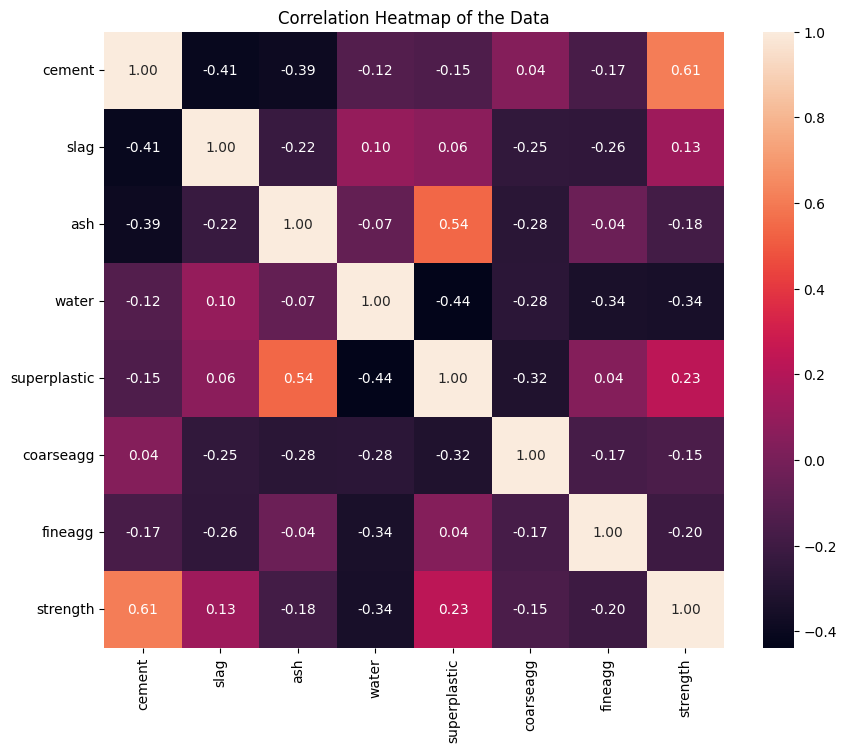

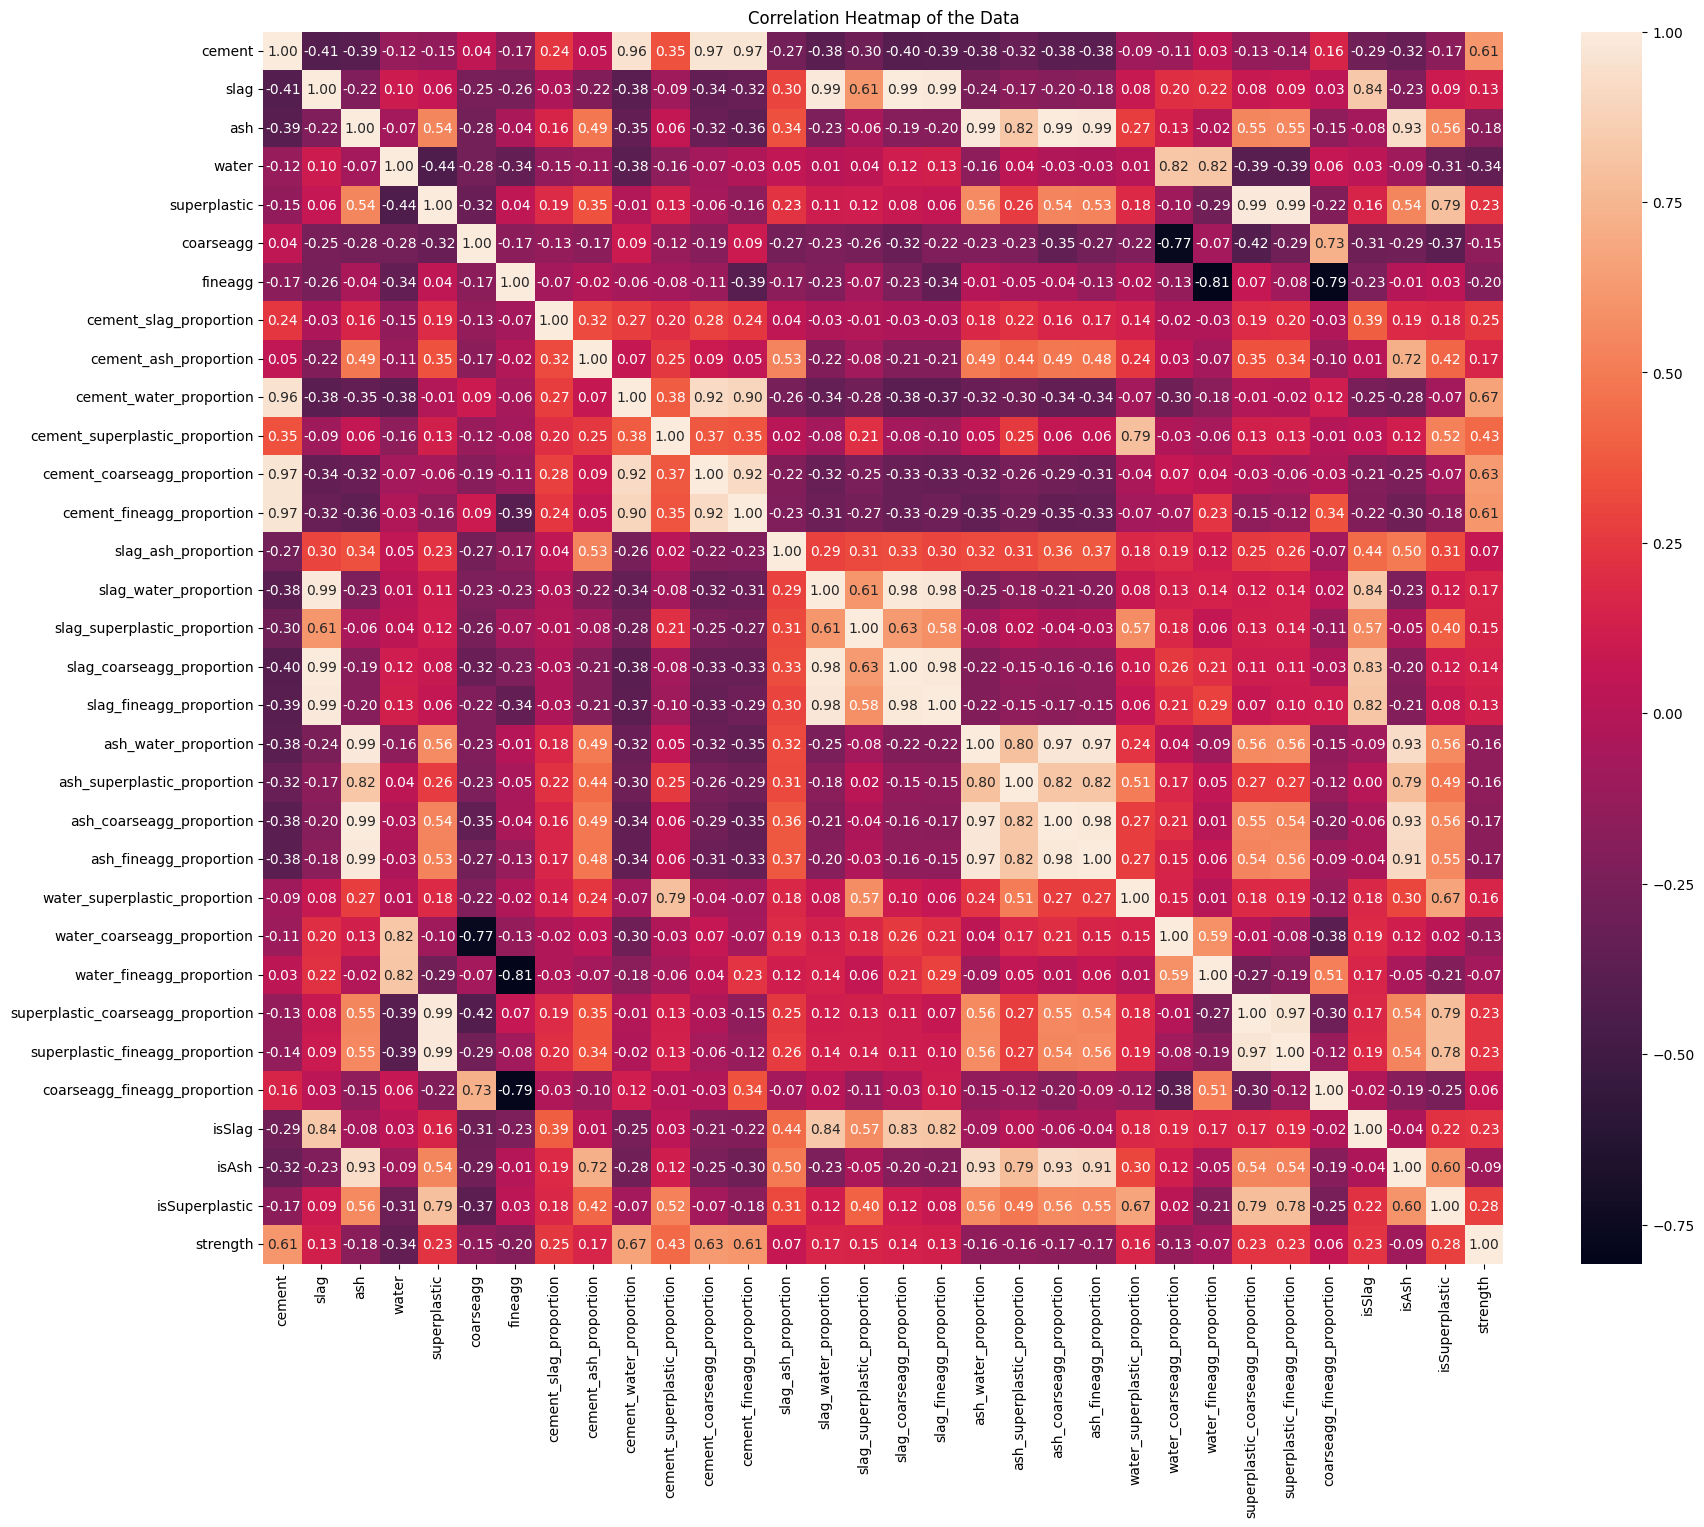

In [188]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap of the Data')
plt.show()

plt.figure(figsize=(20, 16))
sns.heatmap(extendedData.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap of the Data')
plt.show()

## Conclusion of preprocessing  
As a result, I have two datasets, one with extended number of features and the other one consisting of only original features. Both do not have time dependency.

# Clastering